In [1]:
#importing libraries

from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import glob

In [2]:
# reading in the 2019 data file

df_19 = pd.read_csv('/Users/kratipatidar/Desktop/spring21_GA/prof_ahsan/data/jan19_dec19_new.csv')
df_19

,Unnamed: 0,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,extracted_category
0,0,72,A flexible pack you can customise and decorate...,"{""id"":262,""name"":""Accessories"",""slug"":""fashion...",3537.0,HK,2018-12-10 09:29:04,"{""id"":819653641,""name"":""Paws of Pride"",""is_reg...",HKD,$,...,pin-backpack-rainbow-window-ita-bags-make100,https://www.kickstarter.com/discover/categorie...,False,False,live,2019-01-02 00:30:17,0.127666,"{""web"":{""project"":""https://www.kickstarter.com...",3543.237168,fashion
1,1,1,"Sophica: Temples Of Mystery, is a First Person...","{""id"":35,""name"":""Video Games"",""slug"":""games/vi...",1.0,NO,2019-01-15 15:12:03,"{""id"":1681336529,""name"":""August Steiro"",""slug""...",NOK,kr,...,sophica-temples-of-mystery,https://www.kickstarter.com/discover/categorie...,False,False,live,2019-01-16 11:50:46,0.117141,"{""web"":{""project"":""https://www.kickstarter.com...",0.937128,games
2,2,3,I would like to create a Windows version of my...,"{""id"":35,""name"":""Video Games"",""slug"":""games/vi...",4.0,US,2019-01-15 16:47:50,"{""id"":1016993612,""name"":""Jonathan L Clark"",""is...",USD,$,...,wooden-blocks-for-windows,https://www.kickstarter.com/discover/categorie...,False,False,live,2019-01-16 20:19:16,1.000000,"{""api"":{""star"":""https://api.kickstarter.com/v1...",4.000000,games
3,3,1,A book compilation of 1950's and 60's inspired...,"{""id"":1,""name"":""Art"",""slug"":""art"",""position"":1...",0.0,CA,2018-12-22 03:31:58,"{""id"":1009927680,""name"":""John Lyes"",""slug"":""ex...",CAD,$,...,modern-retro-the-art-of-john-lyes-0,https://www.kickstarter.com/discover/categorie...,False,False,live,2019-01-07 17:18:21,0.747690,"{""web"":{""project"":""https://www.kickstarter.com...",0.964520,art
4,4,13,View Your Device Comfortably and Hands Free,"{""id"":337,""name"":""Gadgets"",""slug"":""technology/...",1640.0,US,2018-12-30 15:53:22,"{""id"":741479313,""name"":""Nina Seyedabadi"",""slug...",USD,$,...,godonut,https://www.kickstarter.com/discover/categorie...,False,False,live,2019-01-16 17:48:57,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1640.000000,technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422770,422770,1,"Regalare un caffè al prossimo, per il dire che...","{""id"":307,""name"":""Drinks"",""slug"":""food/drinks""...",1.0,IT,2019-08-12 06:54:36,"{""id"":883648186,""name"":""Davide Gioia"",""slug"":""...",EUR,€,...,coffeeme-unidea-storica-che-puo-affascinare-il...,https://www.kickstarter.com/discover/categorie...,False,False,failed,2019-10-11 07:17:03,1.109508,"{""web"":{""project"":""https://www.kickstarter.com...",1.109508,food
422771,422771,100,A Kickstarter only limited edition 40p comicbo...,"{""id"":250,""name"":""Comic Books"",""slug"":""comics/...",1674.0,GB,2019-08-08 10:53:25,"{""id"":496548914,""name"":""Stuart John McCune"",""i...",GBP,£,...,noir-a-dark-sci-fi-collection,https://www.kickstarter.com/discover/categorie...,True,False,successful,2019-09-01 21:59:00,1.216535,"{""web"":{""project"":""https://www.kickstarter.com...",1675.168213,comics
422772,422772,20,Our plan is simple: Build a sustainable and th...,"{""id"":305,""name"":""Community Gardens"",""slug"":""f...",589.0,FR,2019-08-22 14:32:06,"{""id"":330923191,""name"":""Anais and Marina"",""slu...",EUR,€,...,casa-jasmin-permaculture-and-life-project,https://www.kickstarter.com/discover/categorie...,True,True,successful,2019-10-23 17:32:06,1.106850,"{""web"":{""project"":""https://www.kickstarter.com...",586.630362,food
422773,422773,54,A series of space-themed hard enamel pride pins.,"{""id"":262,""name"":""Accessories"",""slug"":""fashion...",2768.0,US,2018-12-17 23:50:01,"{""id"":303418013,""name"":""Beth Hommel"",""slug"":""b...",USD,$,...,space-is-really-gay-hard-enamel-pride-pins,https://www.kic

In [3]:
# checking for duplicates

duplicates = df_19[df_19.duplicated() == True]
duplicates

,Unnamed: 0,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,extracted_category


In [4]:
# reading in all the folder locations

jan20_mar21_folders = []
for x in os.walk('/Users/kratipatidar/Desktop/spring21_GA/prof_ahsan/kickstarter_2020'):
    jan20_mar21_folders.append(x[0])
jan20_mar21_folders.pop(0)

jan20_mar21_folders

['/Users/kratipatidar/Desktop/spring21_GA/prof_ahsan/kickstarter_2020/Kickstarter_2021-01-14T03_20_05_328Z',
 '/Users/kratipatidar/Desktop/spring21_GA/prof_ahsan/kickstarter_2020/Kickstarter_2020-10-15T03_20_03_128Z',
 '/Users/kratipatidar/Desktop/spring21_GA/prof_ahsan/kickstarter_2020/Kickstarter_2021-02-11T03_20_07_976Z',
 '/Users/kratipatidar/Desktop/spring21_GA/prof_ahsan/kickstarter_2020/Kickstarter_2020-05-14T03_20_08_560Z',
 '/Users/kratipatidar/Desktop/spring21_GA/prof_ahsan/kickstarter_2020/Kickstarter_2020-03-12T03_20_06_551Z',
 '/Users/kratipatidar/Desktop/spring21_GA/prof_ahsan/kickstarter_2020/Kickstarter_2020-09-17T03_20_18_143Z',
 '/Users/kratipatidar/Desktop/spring21_GA/prof_ahsan/kickstarter_2020/Kickstarter_2021-03-18T03_20_11_507Z',
 '/Users/kratipatidar/Desktop/spring21_GA/prof_ahsan/kickstarter_2020/Kickstarter_2020-12-17T03_20_12_051Z',
 '/Users/kratipatidar/Desktop/spring21_GA/prof_ahsan/kickstarter_2020/Kickstarter_2020-11-12T03_20_11_453Z',
 '/Users/kratipatid

In [5]:
# here we sort the list of folders, to get ordered list from jan 20 to mar 21

jan20_mar21_folders.sort()
jan20_mar21_folders

['/Users/kratipatidar/Desktop/spring21_GA/prof_ahsan/kickstarter_2020/Kickstarter_2020-01-16T03_20_15_556Z',
 '/Users/kratipatidar/Desktop/spring21_GA/prof_ahsan/kickstarter_2020/Kickstarter_2020-02-13T03_20_04_893Z',
 '/Users/kratipatidar/Desktop/spring21_GA/prof_ahsan/kickstarter_2020/Kickstarter_2020-03-12T03_20_06_551Z',
 '/Users/kratipatidar/Desktop/spring21_GA/prof_ahsan/kickstarter_2020/Kickstarter_2020-04-16T03_20_04_541Z',
 '/Users/kratipatidar/Desktop/spring21_GA/prof_ahsan/kickstarter_2020/Kickstarter_2020-05-14T03_20_08_560Z',
 '/Users/kratipatidar/Desktop/spring21_GA/prof_ahsan/kickstarter_2020/Kickstarter_2020-06-18T03_20_07_487Z',
 '/Users/kratipatidar/Desktop/spring21_GA/prof_ahsan/kickstarter_2020/Kickstarter_2020-07-16T03_20_08_086Z',
 '/Users/kratipatidar/Desktop/spring21_GA/prof_ahsan/kickstarter_2020/Kickstarter_2020-08-13T03_20_17_470Z',
 '/Users/kratipatidar/Desktop/spring21_GA/prof_ahsan/kickstarter_2020/Kickstarter_2020-09-17T03_20_18_143Z',
 '/Users/kratipatid

In [6]:
# defining a function for reading in all the csv files, combining and pre-processing them

def month_df(folder_location):
    csv_files = []
    month_files = glob.glob(folder_location + '/*.csv')
    for file in month_files:
        csv_files.append(pd.read_csv(file))
    df = pd.concat(csv_files, axis=0, ignore_index = True)
    df['created_at'] = pd.to_datetime(df['created_at'],unit='s')
    df['state_changed_at'] = pd.to_datetime(df['state_changed_at'],unit='s')
    df['launched_at'] = pd.to_datetime(df['launched_at'],unit='s')
    return df

In [7]:
# building jan 20 df
jan_20 = month_df(jan20_mar21_folders[0])

# filtering based on jan 19 date
jan19 = jan_20[(jan_20['launched_at'] >= '2019-01-01') & (jan_20['launched_at'] <= '2019-01-31')]

In [8]:
# building feb 20 df
feb_20 = month_df(jan20_mar21_folders[1])

# filtering based on feb 19 dates
feb19 = feb_20[(feb_20['launched_at'] >= '2019-01-01') & (feb_20['launched_at'] <= '2019-02-28')]

In [9]:
# building mar 20 df
mar_20 = month_df(jan20_mar21_folders[2])

# filtering based on mar 19 dates
mar19 = mar_20[(mar_20['launched_at'] >= '2019-01-01') & (mar_20['launched_at'] <= '2019-03-31')]

In [10]:
# building apr 20 df
apr_20 = month_df(jan20_mar21_folders[3])

# filtering based on apr 19 dates
apr19 = apr_20[(apr_20['launched_at'] >= '2019-01-01') & (apr_20['launched_at'] <= '2019-04-30')]

In [11]:
# building may 20 df
may_20 = month_df(jan20_mar21_folders[4])

# filtering based on may 19 dates
may19 = may_20[(may_20['launched_at'] >= '2019-01-01') & (may_20['launched_at'] <= '2019-05-31')]

In [12]:
# building jun 20 df
jun_20 = month_df(jan20_mar21_folders[5])

# filtering based on jun 19 dates
jun19 = jun_20[(jun_20['launched_at'] >= '2019-01-01') & (jun_20['launched_at'] <= '2019-06-30')]

In [13]:
# building jul 20 df
jul_20 = month_df(jan20_mar21_folders[6])

# filtering based on jul 19 dates
jul19 = jul_20[(jul_20['launched_at'] >= '2019-01-01') & (jul_20['launched_at'] <= '2019-07-31')]

In [14]:
# building aug 20 df
aug_20 = month_df(jan20_mar21_folders[7])

# filtering based on aug 19 dates
aug19 = aug_20[(aug_20['launched_at'] >= '2019-01-01') & (aug_20['launched_at'] <= '2019-08-31')]

In [15]:
# building sep 20 df
sep_20 = month_df(jan20_mar21_folders[8])

# filtering based on sep 19 dates
sep19 = sep_20[(sep_20['launched_at'] >= '2019-01-01') & (sep_20['launched_at'] <= '2019-09-30')]

In [16]:
# building oct 20 df
oct_20 = month_df(jan20_mar21_folders[9])

# filtering based on oct 19 dates
oct19 = oct_20[(oct_20['launched_at'] >= '2019-01-01') & (oct_20['launched_at'] <= '2019-10-31')]

In [17]:
# building nov 20 df
nov_20 = month_df(jan20_mar21_folders[10])

# filtering based on nov 19 dates
nov19 = nov_20[(nov_20['launched_at'] >= '2019-01-01') & (nov_20['launched_at'] <= '2019-11-30')]

In [18]:
# building dec 20 df
dec_20 = month_df(jan20_mar21_folders[11])

# filtering based on dec 19 dates
dec19 = dec_20[(dec_20['launched_at'] >= '2019-01-01') & (dec_20['launched_at'] <= '2019-12-31')]

In [19]:
# building jan 21 df
jan_21 = month_df(jan20_mar21_folders[12])

# filtering based on 2019 dates
yr_19_1 = jan_21[(jan_21['launched_at'] >= '2019-01-01') & (jan_21['launched_at'] <= '2019-12-31')]

In [20]:
# building feb 21 df
feb_21 = month_df(jan20_mar21_folders[13])

# filtering based on 2019 dates
yr_19_2 = feb_21[(feb_21['launched_at'] >= '2019-01-01') & (feb_21['launched_at'] <= '2019-12-31')]

In [21]:
# building mar 21 df
mar_21 = month_df(jan20_mar21_folders[14])

# filtering based on 2019 dates
yr_19_3 = mar_21[(mar_21['launched_at'] >= '2019-01-01') & (mar_21['launched_at'] <= '2019-12-31')]

In [22]:
# making a list of dataframes for the year 2019

dfs_19 = [jan19, feb19, mar19, apr19, may19, jun19, jul19, aug19, 
       sep19, oct19, nov19, dec19, yr_19_1, yr_19_2, yr_19_3]

In [23]:
# combining the filtered dataframes into one dataframe
jan19_dec19= pd.concat(dfs_19, axis=0, ignore_index=True)
jan19_dec19

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,last_update_published_at,unread_messages_count,unseen_activity_count
0,2,A project designed to give young adults an opp...,"{""id"":239,""name"":""Radio & Podcasts"",""slug"":""pu...",7.0,GB,the United Kingdom,2018-10-18 09:22:27,"{""id"":1261604137,""name"":""Jeremy Chapman"",""is_r...",GBP,£,...,False,failed,2019-02-04 13:57:50,1.263722,"{""web"":{""project"":""https://www.kickstarter.com...",7.582335,domestic,NaN,NaN,NaN
1,164,A Slanted Reader on Design,"{""id"":18,""name"":""Publishing"",""slug"":""publishin...",7858.0,DE,Germany,2018-12-19 14:27:40,"{""id"":1746968649,""name"":""Slanted Publishers"",""...",EUR,€,...,True,successful,2019-02-17 08:14:39,1.138274,"{""web"":{""project"":""https://www.kickstarter.com...",7918.973122,domestic,NaN,NaN,NaN
2,86,A kawaii enamel pin collection of eight design...,"{""id"":262,""name"":""Accessories"",""slug"":""fashion...",2573.0,US,the United States,2019-01-18 17:17:09,"{""id"":1720694949,""name"":""Tracy Campbell"",""slug...",USD,$,...,False,successful,2019-02-16 17:23:17,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2573.000000,domestic,NaN,NaN,NaN
3,400,A celebration of the Pulp Magazines,"{""id"":324,""name"":""Anthologies"",""slug"":""publish...",11172.0,US,the United States,2018-12-30 20:12:22,"{""id"":661452943,""name"":""Robert Greenberger"",""i...",USD,$,...,True,successful,2019-02-20 02:01:08,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",11172.000000,domestic,NaN,NaN,NaN
4,24,A mass production of my children's book to hel...,"{""id"":46,""name"":""Children's Books"",""slug"":""pub...",2110.0,US,the United States,2019-01-17 00:17:28,"{""id"":532230348,""name"":""Maame Serwaa"",""slug"":""...",USD,$,...,False,successful,2019-03-04 00:43:00,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2110.000000,domestic,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274232,2,"Japanese knotweed (Falopia Japiconia) / foods,...","{""id"":307,""name"":""Drinks"",""slug"":""food/drinks""...",2.0,US,the United States,2019-01-17 12:53:41,"{""id"":1946541676,""name"":""dennis"",""slug"":""knotw...",USD,$,...,False,failed,2019-03-16 06:05:38,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2.000000,international,NaN,NaN,NaN
274233,1,The online vegan food delivery platform.,"{""id"":315,""name"":""Vegan"",""slug"":""food/vegan"",""...",1.0,GB,the United Kingdom,2019-07-20 14:02:35,"{""id"":1401584361,""name"":""Veg-yum"",""is_register...",GBP,£,...,False,failed,2019-09-19 08:23:05,1.215466,"{""web"":{""project"":""https://www.kickstarter.com...",1.215466,international,NaN,NaN,NaN
274234,17,A Redemptive Coffeehouse that breaks the cycle...,"{""id"":312,""name"":""Restaurants"",""slug"":""food/re...",1260.0,US,the United States,2019-10-15 14:35:58,"{""id"":853658556,""name"":""Eric Basye"",""slug"":""ra...",USD,$,...,False,failed,2019-12-29 13:32:57,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1260.000000,international,NaN,NaN,NaN
274235,21,Development of a virtual marketplace to showca...,"{""id"":307,""name"":""Drinks"",""slug"":""food/drinks""...",5910.0,US,the United States,2019-11-06 21:29:15,"{""id"":1102788776,""name"":""Chris Greenfield"",""sl...",USD,$,...,False,successful,2019-11-27 21:30:45,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",5910.000000,international,NaN,NaN,NaN


In [24]:
# writing the above dataframe to a csv
jan19_dec19.to_csv('jandec19.csv', index=False)

In [25]:
# looking at the columns
jan19_dec19.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'country_displayable_name', 'created_at', 'creator',
       'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'disable_communication', 'friends',
       'fx_rate', 'goal', 'id', 'is_backing', 'is_starrable', 'is_starred',
       'launched_at', 'location', 'name', 'permissions', 'photo', 'pledged',
       'profile', 'slug', 'source_url', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'urls', 'usd_pledged',
       'usd_type', 'last_update_published_at', 'unread_messages_count',
       'unseen_activity_count'],
      dtype='object')

In [26]:
# let's process this dataframe first
## dropping columns with missing values for records

jan19_dec19_filt = jan19_dec19.drop(['last_update_published_at', 'unread_messages_count',
       'unseen_activity_count'], axis=1)
jan19_dec19_filt

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,2,A project designed to give young adults an opp...,"{""id"":239,""name"":""Radio & Podcasts"",""slug"":""pu...",7.0,GB,the United Kingdom,2018-10-18 09:22:27,"{""id"":1261604137,""name"":""Jeremy Chapman"",""is_r...",GBP,£,...,your-voice-here-community-internet-radio-and-p...,https://www.kickstarter.com/discover/categorie...,False,False,failed,2019-02-04 13:57:50,1.263722,"{""web"":{""project"":""https://www.kickstarter.com...",7.582335,domestic
1,164,A Slanted Reader on Design,"{""id"":18,""name"":""Publishing"",""slug"":""publishin...",7858.0,DE,Germany,2018-12-19 14:27:40,"{""id"":1746968649,""name"":""Slanted Publishers"",""...",EUR,€,...,total-armageddon,https://www.kickstarter.com/discover/categorie...,True,True,successful,2019-02-17 08:14:39,1.138274,"{""web"":{""project"":""https://www.kickstarter.com...",7918.973122,domestic
2,86,A kawaii enamel pin collection of eight design...,"{""id"":262,""name"":""Accessories"",""slug"":""fashion...",2573.0,US,the United States,2019-01-18 17:17:09,"{""id"":1720694949,""name"":""Tracy Campbell"",""slug...",USD,$,...,kittea-ceremony,https://www.kickstarter.com/discover/categorie...,True,False,successful,2019-02-16 17:23:17,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2573.000000,domestic
3,400,A celebration of the Pulp Magazines,"{""id"":324,""name"":""Anthologies"",""slug"":""publish...",11172.0,US,the United States,2018-12-30 20:12:22,"{""id"":661452943,""name"":""Robert Greenberger"",""i...",USD,$,...,thrilling-adventure-yarns,https://www.kickstarter.com/discover/categorie...,True,True,successful,2019-02-20 02:01:08,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",11172.000000,domestic
4,24,A mass production of my children's book to hel...,"{""id"":46,""name"":""Children's Books"",""slug"":""pub...",2110.0,US,the United States,2019-01-17 00:17:28,"{""id"":532230348,""name"":""Maame Serwaa"",""slug"":""...",USD,$,...,reaching-children-globally-through-books,https://www.kickstarter.com/discover/categorie...,True,False,successful,2019-03-04 00:43:00,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2110.000000,domestic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274232,2,"Japanese knotweed (Falopia Japiconia) / foods,...","{""id"":307,""name"":""Drinks"",""slug"":""food/drinks""...",2.0,US,the United States,2019-01-17 12:53:41,"{""id"":1946541676,""name"":""dennis"",""slug"":""knotw...",USD,$,...,mexican-bamboo-japanese-knotweed-tea-tacos-and...,https://www.kickstarter.com/discover/categorie...,False,False,failed,2019-03-16 06:05:38,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2.000000,international
274233,1,The online vegan food delivery platform.,"{""id"":315,""name"":""Vegan"",""slug"":""food/vegan"",""...",1.0,GB,the United Kingdom,2019-07-20 14:02:35,"{""id"":1401584361,""name"":""Veg-yum"",""is_register...",GBP,£,...,veg-yum,https://www.kickstarter.com/discover/categorie...,False,False,failed,2019-09-19 08:23:05,1.215466,"{""web"":{""project"":""https://www.kickstarter.com...",1.215466,international
274234,17,A Redemptive Coffeehouse that breaks the cycle...,"{""id"":312,""name"":""Restaurants"",""slug"":""food/re...",1260.0,US,the United States,2019-10-15 14:35:58,"{""id"":853658556,""name"":""Eric Basye"",""slug"":""ra...",USD,$,...,rail-line-coffee,https://www.kickstarter.com/discover/categorie...,False,False,failed,2019-12-29 13:32:57,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1260.000000,international
274235,21,Development of a virtual marketplace to showca...,"{""id"":307,""name"":""Drinks"",""slug"":""food/drinks""...",5910.0,US,the United States,2019-11-06 21:29:15,"{""id"":1102788776,""name"

In [27]:
# looking at duplicates in this dataframe
duplicates1 = jan19_dec19_filt[jan19_dec19_filt.duplicated() == True]
duplicates1

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
77159,20,Kate Watson-Wallace’s new performance work kim...,"{""id"":254,""name"":""Performances"",""slug"":""dance/...",1968.0,US,the United States,2019-06-08 16:08:10,"{""id"":1661067133,""name"":""Kate Watson-Wallace"",...",USD,$,...,kim-0,https://www.kickstarter.com/discover/categorie...,False,True,failed,2019-07-17 18:55:06,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1968.000000,domestic
79099,2,The critically acclaimed Wanderlust Dance Proj...,"{""id"":254,""name"":""Performances"",""slug"":""dance/...",26.0,US,the United States,2019-07-23 06:12:00,"{""id"":78271185,""name"":""Addison Reed"",""slug"":""w...",USD,$,...,wanderlust-dance-project-iv,https://www.kickstarter.com/discover/categorie...,False,False,failed,2019-07-27 06:45:00,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",26.000000,domestic
79258,70,Help us fund the mixing and mastering of our f...,"{""id"":42,""name"":""Pop"",""slug"":""music/pop"",""posi...",3916.0,GB,the United Kingdom,2019-03-24 20:32:06,"{""id"":1323660122,""name"":""Little Brother Eli"",""...",GBP,£,...,little-brother-eli-live-album,https://www.kickstarter.com/discover/categorie...,True,False,successful,2019-05-01 07:36:35,1.304400,"{""web"":{""project"":""https://www.kickstarter.com...",3917.113200,domestic
80009,16,a novella by Patrick Barney,"{""id"":47,""name"":""Fiction"",""slug"":""publishing/f...",426.0,US,the United States,2019-08-08 14:28:44,"{""id"":638868403,""name"":""Patrick Barney"",""is_re...",USD,$,...,misfit-the-wanderer,https://www.kickstarter.com/discover/categorie...,True,False,successful,2019-09-11 13:56:32,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",426.000000,domestic
80504,40,I'm raising funds to release two EP's! Heartfe...,"{""id"":14,""name"":""Music"",""slug"":""music"",""positi...",1862.0,GB,the United Kingdom,2019-03-11 13:30:40,"{""id"":1427676786,""name"":""Kitty Stewart"",""slug""...",GBP,£,...,kitty-stewarts-music-project,https://www.kickstarter.com/discover/categorie...,True,False,successful,2019-05-01 11:00:01,1.309055,"{""web"":{""project"":""https://www.kickstarter.com...",1869.330154,domestic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94821,160,New Album,"{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",8365.0,GB,the United Kingdom,2019-03-15 11:33:37,"{""id"":472391093,""name"":""Syteria"",""is_registere...",GBP,£,...,the-new-syteria-album-reflection,https://www.kickstarter.com/discover/categorie...,True,True,successful,2019-06-05 16:59:41,1.309055,"{""web"":{""project"":""https://www.kickstarter.com...",8618.816342,domestic
94835,4,"Final Fantasy XV Tote Bag, 'Stand By Me' lyric...","{""id"":351,""name"":""Printing"",""slug"":""crafts/pri...",100.0,US,the United States,2019-08-11 11:55:39,"{""id"":285906314,""name"":""Michelle Reese"",""slug""...",USD,$,...,final-fantasy-xv-stand-by-me-tote-bag,https://www.kickstarter.com/discover/categorie...,False,False,failed,2019-08-31 22:39:32,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",100.000000,domestic
95003,2,A brand new eBook & paperback book cover,"{""id"":47,""name"":""Fiction"",""slug"":""publishing/f...",130.0,GB,the United Kingdom,2019-08-25 02:04:13,"{""id"":1513464618,""name"":""Philippa Attwood"",""sl...",GBP,£,...,texas-eire-always-alone-book-two,https://www.kickstarter.com/discover/categorie...,True,False,successful,2019-10-24 22:59:01,1.227702,"{""web"":{""project"":""https://www.kickstarter.com...",123.997888,domestic
95018,97,En kreativ og humoristisk roman med Skibladner...,"{""id"":47,""name"":""Fiction"",""slug"":""publishing/f...",5935.0,NO,Norway,2019-06-11 03:47:33,"{""id"":883984792,""name"":""Einar Wedoe"",""slug"

In [28]:
## splitting the source_url column to obtain different categories

jan19_dec19_filt['extracted_category']=jan19_dec19_filt['source_url'].str.split('/', expand=True)[5]
jan19_dec19_filt.head()

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,extracted_category
0,2,A project designed to give young adults an opp...,"{""id"":239,""name"":""Radio & Podcasts"",""slug"":""pu...",7.0,GB,the United Kingdom,2018-10-18 09:22:27,"{""id"":1261604137,""name"":""Jeremy Chapman"",""is_r...",GBP,£,...,https://www.kickstarter.com/discover/categorie...,False,False,failed,2019-02-04 13:57:50,1.263722,"{""web"":{""project"":""https://www.kickstarter.com...",7.582335,domestic,publishing
1,164,A Slanted Reader on Design,"{""id"":18,""name"":""Publishing"",""slug"":""publishin...",7858.0,DE,Germany,2018-12-19 14:27:40,"{""id"":1746968649,""name"":""Slanted Publishers"",""...",EUR,€,...,https://www.kickstarter.com/discover/categorie...,True,True,successful,2019-02-17 08:14:39,1.138274,"{""web"":{""project"":""https://www.kickstarter.com...",7918.973122,domestic,publishing
2,86,A kawaii enamel pin collection of eight design...,"{""id"":262,""name"":""Accessories"",""slug"":""fashion...",2573.0,US,the United States,2019-01-18 17:17:09,"{""id"":1720694949,""name"":""Tracy Campbell"",""slug...",USD,$,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,2019-02-16 17:23:17,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2573.000000,domestic,fashion
3,400,A celebration of the Pulp Magazines,"{""id"":324,""name"":""Anthologies"",""slug"":""publish...",11172.0,US,the United States,2018-12-30 20:12:22,"{""id"":661452943,""name"":""Robert Greenberger"",""i...",USD,$,...,https://www.kickstarter.com/discover/categorie...,True,True,successful,2019-02-20 02:01:08,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",11172.000000,domestic,publishing
4,24,A mass production of my children's book to hel...,"{""id"":46,""name"":""Children's Books"",""slug"":""pub...",2110.0,US,the United States,2019-01-17 00:17:28,"{""id"":532230348,""name"":""Maame Serwaa"",""slug"":""...",USD,$,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,2019-03-04 00:43:00,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2110.000000,domestic,publishing


In [29]:
#replacing 'film%20&%20video' category with 'film and video'
jan19_dec19_filt = jan19_dec19_filt.replace('film%20&%20video', 'film and video')
jan19_dec19_filt.head()

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,extracted_category
0,2,A project designed to give young adults an opp...,"{""id"":239,""name"":""Radio & Podcasts"",""slug"":""pu...",7.0,GB,the United Kingdom,2018-10-18 09:22:27,"{""id"":1261604137,""name"":""Jeremy Chapman"",""is_r...",GBP,£,...,https://www.kickstarter.com/discover/categorie...,False,False,failed,2019-02-04 13:57:50,1.263722,"{""web"":{""project"":""https://www.kickstarter.com...",7.582335,domestic,publishing
1,164,A Slanted Reader on Design,"{""id"":18,""name"":""Publishing"",""slug"":""publishin...",7858.0,DE,Germany,2018-12-19 14:27:40,"{""id"":1746968649,""name"":""Slanted Publishers"",""...",EUR,€,...,https://www.kickstarter.com/discover/categorie...,True,True,successful,2019-02-17 08:14:39,1.138274,"{""web"":{""project"":""https://www.kickstarter.com...",7918.973122,domestic,publishing
2,86,A kawaii enamel pin collection of eight design...,"{""id"":262,""name"":""Accessories"",""slug"":""fashion...",2573.0,US,the United States,2019-01-18 17:17:09,"{""id"":1720694949,""name"":""Tracy Campbell"",""slug...",USD,$,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,2019-02-16 17:23:17,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2573.000000,domestic,fashion
3,400,A celebration of the Pulp Magazines,"{""id"":324,""name"":""Anthologies"",""slug"":""publish...",11172.0,US,the United States,2018-12-30 20:12:22,"{""id"":661452943,""name"":""Robert Greenberger"",""i...",USD,$,...,https://www.kickstarter.com/discover/categorie...,True,True,successful,2019-02-20 02:01:08,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",11172.000000,domestic,publishing
4,24,A mass production of my children's book to hel...,"{""id"":46,""name"":""Children's Books"",""slug"":""pub...",2110.0,US,the United States,2019-01-17 00:17:28,"{""id"":532230348,""name"":""Maame Serwaa"",""slug"":""...",USD,$,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,2019-03-04 00:43:00,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2110.000000,domestic,publishing


In [30]:
# in the above step, we have created a dataframe from extracted data from 2020 files
## let's combine this dataframe with the dataframe we already have for the year 2019

## first fix the df_19
df_19_fix = df_19.drop(['Unnamed: 0'], axis=1)
df_19_fix.head()

## now combine - list
dfs_2019 = [df_19_fix, jan19_dec19_filt]

## concatenate
combo19 = pd.concat(dfs_2019, axis=0, ignore_index=True)
combo19

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,static_usd_rate,urls,usd_pledged,extracted_category,country_displayable_name,friends,is_backing,is_starred,permissions,usd_type
0,72,A flexible pack you can customise and decorate...,"{""id"":262,""name"":""Accessories"",""slug"":""fashion...",3537.0,HK,2018-12-10 09:29:04,"{""id"":819653641,""name"":""Paws of Pride"",""is_reg...",HKD,$,True,...,0.127666,"{""web"":{""project"":""https://www.kickstarter.com...",3543.237168,fashion,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"Sophica: Temples Of Mystery, is a First Person...","{""id"":35,""name"":""Video Games"",""slug"":""games/vi...",1.0,NO,2019-01-15 15:12:03,"{""id"":1681336529,""name"":""August Steiro"",""slug""...",NOK,kr,True,...,0.117141,"{""web"":{""project"":""https://www.kickstarter.com...",0.937128,games,NaN,NaN,NaN,NaN,NaN,NaN
2,3,I would like to create a Windows version of my...,"{""id"":35,""name"":""Video Games"",""slug"":""games/vi...",4.0,US,2019-01-15 16:47:50,"{""id"":1016993612,""name"":""Jonathan L Clark"",""is...",USD,$,True,...,1.000000,"{""api"":{""star"":""https://api.kickstarter.com/v1...",4.000000,games,NaN,NaN,NaN,NaN,NaN,NaN
3,1,A book compilation of 1950's and 60's inspired...,"{""id"":1,""name"":""Art"",""slug"":""art"",""position"":1...",0.0,CA,2018-12-22 03:31:58,"{""id"":1009927680,""name"":""John Lyes"",""slug"":""ex...",CAD,$,True,...,0.747690,"{""web"":{""project"":""https://www.kickstarter.com...",0.964520,art,NaN,NaN,NaN,NaN,NaN,NaN
4,13,View Your Device Comfortably and Hands Free,"{""id"":337,""name"":""Gadgets"",""slug"":""technology/...",1640.0,US,2018-12-30 15:53:22,"{""id"":741479313,""name"":""Nina Seyedabadi"",""slug...",USD,$,True,...,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1640.000000,technology,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697007,2,"Japanese knotweed (Falopia Japiconia) / foods,...","{""id"":307,""name"":""Drinks"",""slug"":""food/drinks""...",2.0,US,2019-01-17 12:53:41,"{""id"":1946541676,""name"":""dennis"",""slug"":""knotw...",USD,$,True,...,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2.000000,food,the United States,NaN,NaN,NaN,NaN,international
697008,1,The online vegan food delivery platform.,"{""id"":315,""name"":""Vegan"",""slug"":""food/vegan"",""...",1.0,GB,2019-07-20 14:02:35,"{""id"":1401584361,""name"":""Veg-yum"",""is_register...",GBP,£,False,...,1.215466,"{""web"":{""project"":""https://www.kickstarter.com...",1.215466,food,the United Kingdom,NaN,NaN,NaN,NaN,international
697009,17,A Redemptive Coffeehouse that breaks the cycle...,"{""id"":312,""name"":""Restaurants"",""slug"":""food/re...",1260.0,US,2019-10-15 14:35:58,"{""id"":853658556,""name"":""Eric Basye"",""slug"":""ra...",USD,$,True,...,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1260.000000,food,the United States,NaN,NaN,NaN,NaN,international
697010,21,Development of a virtual marketplace to showca...,"{""id"":307,""name"":""Drinks"",""slug"":""food/drinks""...",5910.0,US,2019-11-06 21:29:15,"{""id"":1102788776,""name"":""Chris Greenfield"",""sl...",USD,$,True,...,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",5910.000000,food,the United States,NaN,NaN,NaN,NaN,international


In [31]:
# dropping duplicates across all the columns in the jan20_jun20_filtered dataframe 
df_2019 = combo19.drop_duplicates(subset=None, keep='first', inplace=False)
df_2019

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,static_usd_rate,urls,usd_pledged,extracted_category,country_displayable_name,friends,is_backing,is_starred,permissions,usd_type
0,72,A flexible pack you can customise and decorate...,"{""id"":262,""name"":""Accessories"",""slug"":""fashion...",3537.0,HK,2018-12-10 09:29:04,"{""id"":819653641,""name"":""Paws of Pride"",""is_reg...",HKD,$,True,...,0.127666,"{""web"":{""project"":""https://www.kickstarter.com...",3543.237168,fashion,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"Sophica: Temples Of Mystery, is a First Person...","{""id"":35,""name"":""Video Games"",""slug"":""games/vi...",1.0,NO,2019-01-15 15:12:03,"{""id"":1681336529,""name"":""August Steiro"",""slug""...",NOK,kr,True,...,0.117141,"{""web"":{""project"":""https://www.kickstarter.com...",0.937128,games,NaN,NaN,NaN,NaN,NaN,NaN
2,3,I would like to create a Windows version of my...,"{""id"":35,""name"":""Video Games"",""slug"":""games/vi...",4.0,US,2019-01-15 16:47:50,"{""id"":1016993612,""name"":""Jonathan L Clark"",""is...",USD,$,True,...,1.000000,"{""api"":{""star"":""https://api.kickstarter.com/v1...",4.000000,games,NaN,NaN,NaN,NaN,NaN,NaN
3,1,A book compilation of 1950's and 60's inspired...,"{""id"":1,""name"":""Art"",""slug"":""art"",""position"":1...",0.0,CA,2018-12-22 03:31:58,"{""id"":1009927680,""name"":""John Lyes"",""slug"":""ex...",CAD,$,True,...,0.747690,"{""web"":{""project"":""https://www.kickstarter.com...",0.964520,art,NaN,NaN,NaN,NaN,NaN,NaN
4,13,View Your Device Comfortably and Hands Free,"{""id"":337,""name"":""Gadgets"",""slug"":""technology/...",1640.0,US,2018-12-30 15:53:22,"{""id"":741479313,""name"":""Nina Seyedabadi"",""slug...",USD,$,True,...,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1640.000000,technology,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697007,2,"Japanese knotweed (Falopia Japiconia) / foods,...","{""id"":307,""name"":""Drinks"",""slug"":""food/drinks""...",2.0,US,2019-01-17 12:53:41,"{""id"":1946541676,""name"":""dennis"",""slug"":""knotw...",USD,$,True,...,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2.000000,food,the United States,NaN,NaN,NaN,NaN,international
697008,1,The online vegan food delivery platform.,"{""id"":315,""name"":""Vegan"",""slug"":""food/vegan"",""...",1.0,GB,2019-07-20 14:02:35,"{""id"":1401584361,""name"":""Veg-yum"",""is_register...",GBP,£,False,...,1.215466,"{""web"":{""project"":""https://www.kickstarter.com...",1.215466,food,the United Kingdom,NaN,NaN,NaN,NaN,international
697009,17,A Redemptive Coffeehouse that breaks the cycle...,"{""id"":312,""name"":""Restaurants"",""slug"":""food/re...",1260.0,US,2019-10-15 14:35:58,"{""id"":853658556,""name"":""Eric Basye"",""slug"":""ra...",USD,$,True,...,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1260.000000,food,the United States,NaN,NaN,NaN,NaN,international
697010,21,Development of a virtual marketplace to showca...,"{""id"":307,""name"":""Drinks"",""slug"":""food/drinks""...",5910.0,US,2019-11-06 21:29:15,"{""id"":1102788776,""name"":""Chris Greenfield"",""sl...",USD,$,True,...,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",5910.000000,food,the United States,NaN,NaN,NaN,NaN,international


In [32]:
# eliminating the state column temporarily to look for duplicates again

df_2019_ns = df_2019.copy()
df_2019_ns.drop(['state'], axis=1, inplace=True)

In [36]:
# checking for duplicates in this dataframe

duplicates3 = df_2019_ns[df_2019_ns.duplicated() == True]
duplicates3

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,extracted_category,country_displayable_name,friends,is_backing,is_starred,permissions,usd_type,last_update_published_at,unread_messages_count,unseen_activity_count


In [34]:
# Looking at launched_at column
df_2019.launched_at

0         2019-01-02 00:30:17
1         2019-01-16 11:50:46
2         2019-01-16 20:19:16
3         2019-01-07 17:18:21
4         2019-01-16 17:48:56
                 ...         
697007    2019-02-14 07:05:38
697008    2019-08-20 08:23:04
697009    2019-11-14 13:32:57
697010    2019-11-12 21:30:45
697011    2019-03-10 13:41:57
Name: launched_at, Length: 696897, dtype: object

In [35]:
# now we will modify the launched_at column
## removing timestamp
df_2019['launched_at'] = pd.to_datetime(df_2019['launched_at']).dt.date

## changing back to datetime format
df_2019['launched_at'] = pd.to_datetime(df_2019['launched_at'])

## checking dtypes
df_2019.dtypes

<ipython-input-35-97c7ed2db84f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['launched_at'] = pd.to_datetime(df_2019['launched_at']).dt.date
<ipython-input-35-97c7ed2db84f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['launched_at'] = pd.to_datetime(df_2019['launched_at'])


backers_count                        int64
blurb                               object
category                            object
converted_pledged_amount           float64
country                             object
created_at                          object
creator                             object
currency                            object
currency_symbol                     object
currency_trailing_code                bool
current_currency                    object
deadline                             int64
disable_communication                 bool
fx_rate                            float64
goal                               float64
id                                   int64
is_starrable                          bool
launched_at                 datetime64[ns]
location                            object
name                                object
photo                               object
pledged                            float64
profile                             object
slug       

In [36]:
# writing the above dataframe to a csv
#compression_opts = dict(method='zip', archive_name='year_2019.csv')  
df_2019.to_csv('year_2019.csv', index=False)

In [37]:
# Now, we will segregate this dataframe based on state of the projects. The successful and failed projects
##will form one dataframe which will be analyzed, and the live and canceled will form another dataframe.

jan19dec19_sf = df_2019[(df_2019['state']== 'successful') | (df_2019['state']== 'failed')]
jan19dec19_sf

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,static_usd_rate,urls,usd_pledged,extracted_category,country_displayable_name,friends,is_backing,is_starred,permissions,usd_type
55,15,A Fun Feline inspired celestial journey throug...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",544.0,US,2018-12-31 19:30:51,"{""id"":796990185,""name"":""Michele Hartsoe"",""is_r...",USD,$,True,...,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",544.000000,games,NaN,NaN,NaN,NaN,NaN,NaN
243,15,A Fun Feline inspired celestial journey throug...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",544.0,US,2018-12-31 19:30:51,"{""id"":796990185,""name"":""Michele Hartsoe"",""is_r...",USD,$,True,...,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",544.000000,games,NaN,NaN,NaN,NaN,NaN,NaN
284,123,Numbered collectors edition of a new/fresh dec...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",6564.0,US,2018-12-22 06:07:15,"{""id"":1381495611,""name"":""Jason Nguyen"",""slug"":...",USD,$,True,...,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",6564.000000,games,NaN,NaN,NaN,NaN,NaN,NaN
422,40,Metal 28mm Fantasy Goulblin miniature for Anci...,"{""id"":34,""name"":""Tabletop Games"",""slug"":""games...",1141.0,GB,2019-01-02 09:03:47,"{""id"":2076383099,""name"":""Macrocosm"",""is_regist...",GBP,£,False,...,1.275022,"{""web"":{""project"":""https://www.kickstarter.com...",1133.494834,games,NaN,NaN,NaN,NaN,NaN,NaN
481,15,A hard enamel pin of a photography crazed dem...,"{""id"":262,""name"":""Accessories"",""slug"":""fashion...",329.0,CA,2018-09-07 06:34:38,"{""id"":2040890711,""name"":""Plushiie"",""is_registe...",CAD,$,True,...,0.733544,"{""web"":{""project"":""https://www.kickstarter.com...",320.771395,fashion,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697007,2,"Japanese knotweed (Falopia Japiconia) / foods,...","{""id"":307,""name"":""Drinks"",""slug"":""food/drinks""...",2.0,US,2019-01-17 12:53:41,"{""id"":1946541676,""name"":""dennis"",""slug"":""knotw...",USD,$,True,...,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2.000000,food,the United States,NaN,NaN,NaN,NaN,international
697008,1,The online vegan food delivery platform.,"{""id"":315,""name"":""Vegan"",""slug"":""food/vegan"",""...",1.0,GB,2019-07-20 14:02:35,"{""id"":1401584361,""name"":""Veg-yum"",""is_register...",GBP,£,False,...,1.215466,"{""web"":{""project"":""https://www.kickstarter.com...",1.215466,food,the United Kingdom,NaN,NaN,NaN,NaN,international
697009,17,A Redemptive Coffeehouse that breaks the cycle...,"{""id"":312,""name"":""Restaurants"",""slug"":""food/re...",1260.0,US,2019-10-15 14:35:58,"{""id"":853658556,""name"":""Eric Basye"",""slug"":""ra...",USD,$,True,...,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1260.000000,food,the United States,NaN,NaN,NaN,NaN,international
697010,21,Development of a virtual marketplace to showca...,"{""id"":307,""name"":""Drinks"",""slug"":""food/drinks""...",5910.0,US,2019-11-06 21:29:15,"{""id"":1102788776,""name"":""Chris Greenfield"",""sl...",USD,$,True,...,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",5910.000000,food,the United States,NaN,NaN,NaN,NaN,international


In [38]:
# we will write this df (with successful and failed projects) to another csv
jan19dec19_sf.to_csv('year_2019_sf.csv', index=False)

In [39]:
# Here, we store the live and canceled projects to another dataframe

jan19dec19_lc = df_2019[(df_2019['state']== 'live') | (df_2019['state']== 'canceled')]
jan19dec19_lc

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,static_usd_rate,urls,usd_pledged,extracted_category,country_displayable_name,friends,is_backing,is_starred,permissions,usd_type
0,72,A flexible pack you can customise and decorate...,"{""id"":262,""name"":""Accessories"",""slug"":""fashion...",3537.0,HK,2018-12-10 09:29:04,"{""id"":819653641,""name"":""Paws of Pride"",""is_reg...",HKD,$,True,...,0.127666,"{""web"":{""project"":""https://www.kickstarter.com...",3543.237168,fashion,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"Sophica: Temples Of Mystery, is a First Person...","{""id"":35,""name"":""Video Games"",""slug"":""games/vi...",1.0,NO,2019-01-15 15:12:03,"{""id"":1681336529,""name"":""August Steiro"",""slug""...",NOK,kr,True,...,0.117141,"{""web"":{""project"":""https://www.kickstarter.com...",0.937128,games,NaN,NaN,NaN,NaN,NaN,NaN
2,3,I would like to create a Windows version of my...,"{""id"":35,""name"":""Video Games"",""slug"":""games/vi...",4.0,US,2019-01-15 16:47:50,"{""id"":1016993612,""name"":""Jonathan L Clark"",""is...",USD,$,True,...,1.000000,"{""api"":{""star"":""https://api.kickstarter.com/v1...",4.000000,games,NaN,NaN,NaN,NaN,NaN,NaN
3,1,A book compilation of 1950's and 60's inspired...,"{""id"":1,""name"":""Art"",""slug"":""art"",""position"":1...",0.0,CA,2018-12-22 03:31:58,"{""id"":1009927680,""name"":""John Lyes"",""slug"":""ex...",CAD,$,True,...,0.747690,"{""web"":{""project"":""https://www.kickstarter.com...",0.964520,art,NaN,NaN,NaN,NaN,NaN,NaN
4,13,View Your Device Comfortably and Hands Free,"{""id"":337,""name"":""Gadgets"",""slug"":""technology/...",1640.0,US,2018-12-30 15:53:22,"{""id"":741479313,""name"":""Nina Seyedabadi"",""slug...",USD,$,True,...,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1640.000000,technology,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696901,2,"Motivate, Educate and Simplify the saving and ...","{""id"":328,""name"":""Young Adult"",""slug"":""publish...",8.0,CA,2019-05-14 21:56:20,"{""id"":417867886,""name"":""Julia Cavasinni"",""slug...",CAD,$,True,...,0.744084,"{""web"":{""project"":""https://www.kickstarter.com...",8.400704,publishing,Canada,NaN,NaN,NaN,NaN,international
696954,1,We help people bring out the talent hidden und...,"{""id"":44,""name"":""World Music"",""slug"":""music/wo...",0.0,CA,2019-11-23 15:27:18,"{""id"":982567025,""name"":""Presley .E. Isaiah"",""s...",CAD,$,True,...,0.754575,"{""web"":{""project"":""https://www.kickstarter.com...",0.973401,music,Canada,NaN,NaN,NaN,NaN,international
696982,3,Great-Tasting Comfort Food and Soul Food Combi...,"{""id"":311,""name"":""Food Trucks"",""slug"":""food/fo...",63.0,CA,2019-08-16 17:40:11,"{""id"":1878759916,""name"":""Ria's Kitchen"",""slug""...",CAD,$,True,...,0.751004,"{""web"":{""project"":""https://www.kickstarter.com...",63.302167,food,Canada,NaN,NaN,NaN,NaN,international
696996,1,A recipe sharing platform where you can also p...,"{""id"":306,""name"":""Cookbooks"",""slug"":""food/cook...",0.0,CA,2019-03-05 19:00:17,"{""id"":1522900770,""name"":""Annie (deleted)"",""is_...",CAD,$,True,...,0.750816,"{""web"":{""project"":""https://www.kickstarter.com...",0.968552,food,Canada,NaN,NaN,NaN,NaN,international


In [41]:
# setting the date as index of jan19dec19_sf for further analysis
jan19dec19_sf.set_index('launched_at', inplace=True)
jan19dec19_sf.head()

In [44]:
# fixing the names of countries for matching purposes later on

jan19dec19_sf = jan19dec19_sf.replace('the United States', 'United States')
jan19dec19_sf = jan19dec19_sf.replace('the United Kingdom', 'United Kingdom')
jan19dec19_sf = jan19dec19_sf.replace('the Netherlands', 'Netherlands')

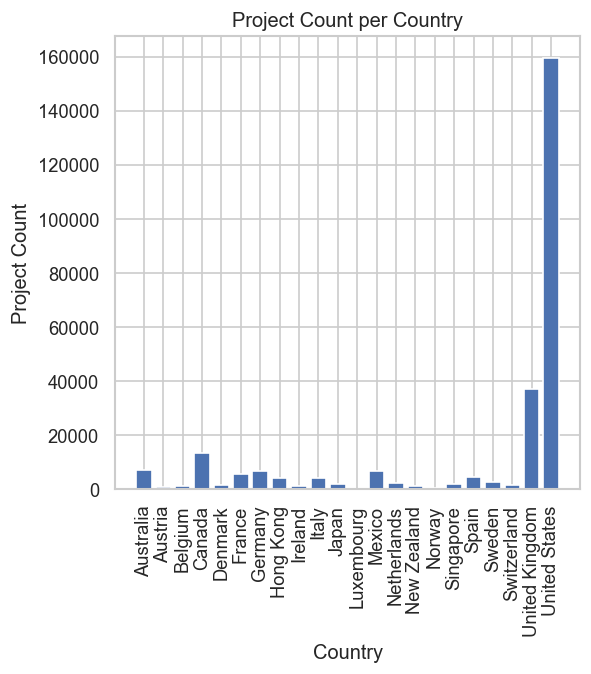

In [45]:
# plotting number of projects country-wise
p1 = pd.DataFrame(jan19dec19_sf.groupby('country_displayable_name')['blurb'].count()).reset_index()
# Use white grid plot background from seaborn
sns.set(font_scale=1, style="whitegrid")

#setting up plot
plt.figure(figsize=(5,5), dpi= 120)
plt.bar('country_displayable_name', 'blurb', data=p1)
plt.xlabel('Country')
plt.ylabel('Project Count')
plt.title('Project Count per Country')
plt.xticks(rotation='vertical')
plt.show()

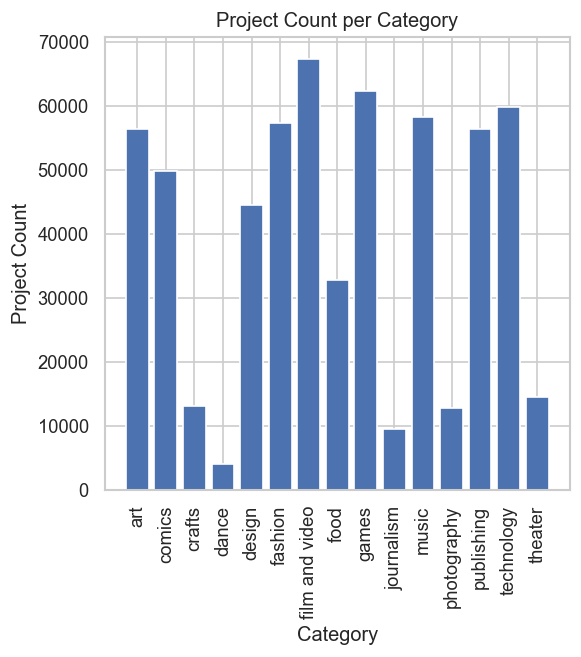

In [47]:
# plotting number of projects category-wise
p2 = pd.DataFrame(jan19dec19_sf.groupby('extracted_category')['blurb'].count()).reset_index()

# Use white grid plot background from seaborn
sns.set(font_scale=1, style="whitegrid")

#setting up plot
plt.figure(figsize=(5,5), dpi= 120)
plt.bar('extracted_category', 'blurb', data=p2)
plt.xlabel('Category')
plt.ylabel('Project Count')
plt.title('Project Count per Category')
plt.xticks(rotation='vertical')
plt.show()

In [51]:
# grouping the dataframe monthly for plotting time series - for countries
monthly_19 = pd.DataFrame(jan19dec19_sf.groupby([pd.Grouper(freq='M'), 'country_displayable_name'])['blurb'].count()).reset_index()
monthly_19

,launched_at,country_displayable_name,blurb
0,2019-01-31,Australia,636
1,2019-01-31,Austria,6
2,2019-01-31,Belgium,172
3,2019-01-31,Canada,1556
4,2019-01-31,Denmark,215
...,...,...,...
252,2019-12-31,Spain,116
253,2019-12-31,Sweden,62
254,2019-12-31,Switzerland,32
255,2019-12-31,United Kingdom,769


In [54]:
# Getting unique countries
countries = list(monthly_19['country_displayable_name'].unique())
len(countries)

22

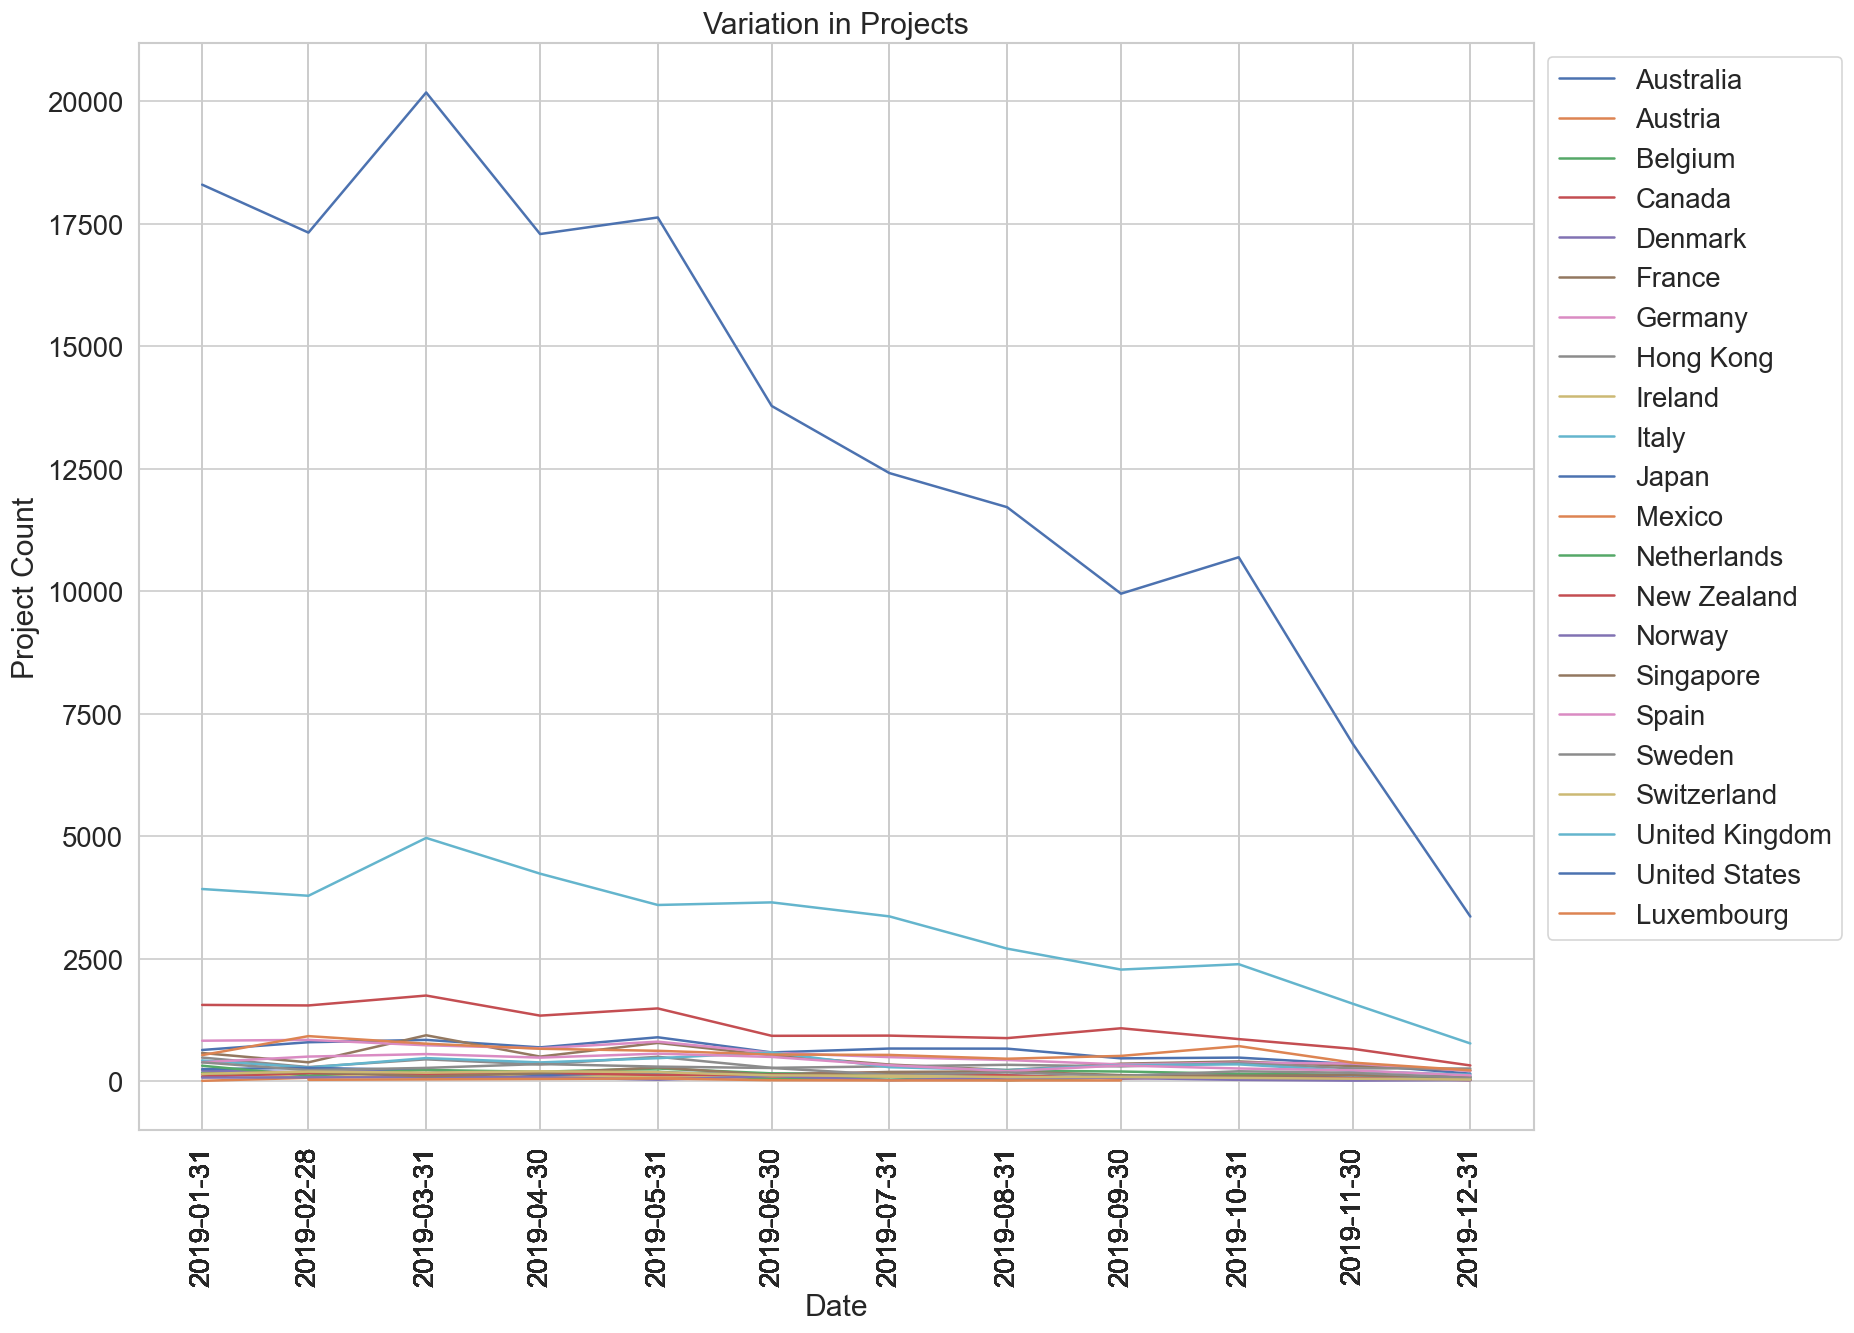

In [56]:
# PLOTTING THE TIME SERIES

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

#setting up plot
plt.figure(figsize=(15,12), dpi= 120)

#function for plot
for i,c in enumerate(countries):
    plt.plot('launched_at', 'blurb', 
             data= monthly_19.loc[monthly_19.country_displayable_name == c, :],label=c)
    plt.legend(loc= 'best', bbox_to_anchor = (1,1))
    #locs, labels = xticks()
    plt.xticks(monthly_19['launched_at'].values, rotation='vertical')
    plt.xlabel('Date')
    plt.ylabel('Project Count')
    plt.title('Variation in Projects')


In [57]:
# grouping by categories
grouped_df_cat = pd.DataFrame(jan19dec19_sf.groupby([pd.Grouper(freq='M'), 'extracted_category'])['blurb'].count()).reset_index()
grouped_df_cat.head()

,launched_at,extracted_category,blurb
0,2019-01-31,art,8249
1,2019-01-31,comics,5367
2,2019-01-31,crafts,2216
3,2019-01-31,dance,288
4,2019-01-31,design,4584


In [58]:
# Getting unique categories
categories = list(grouped_df_cat['extracted_category'].unique())
print(len(categories))

15


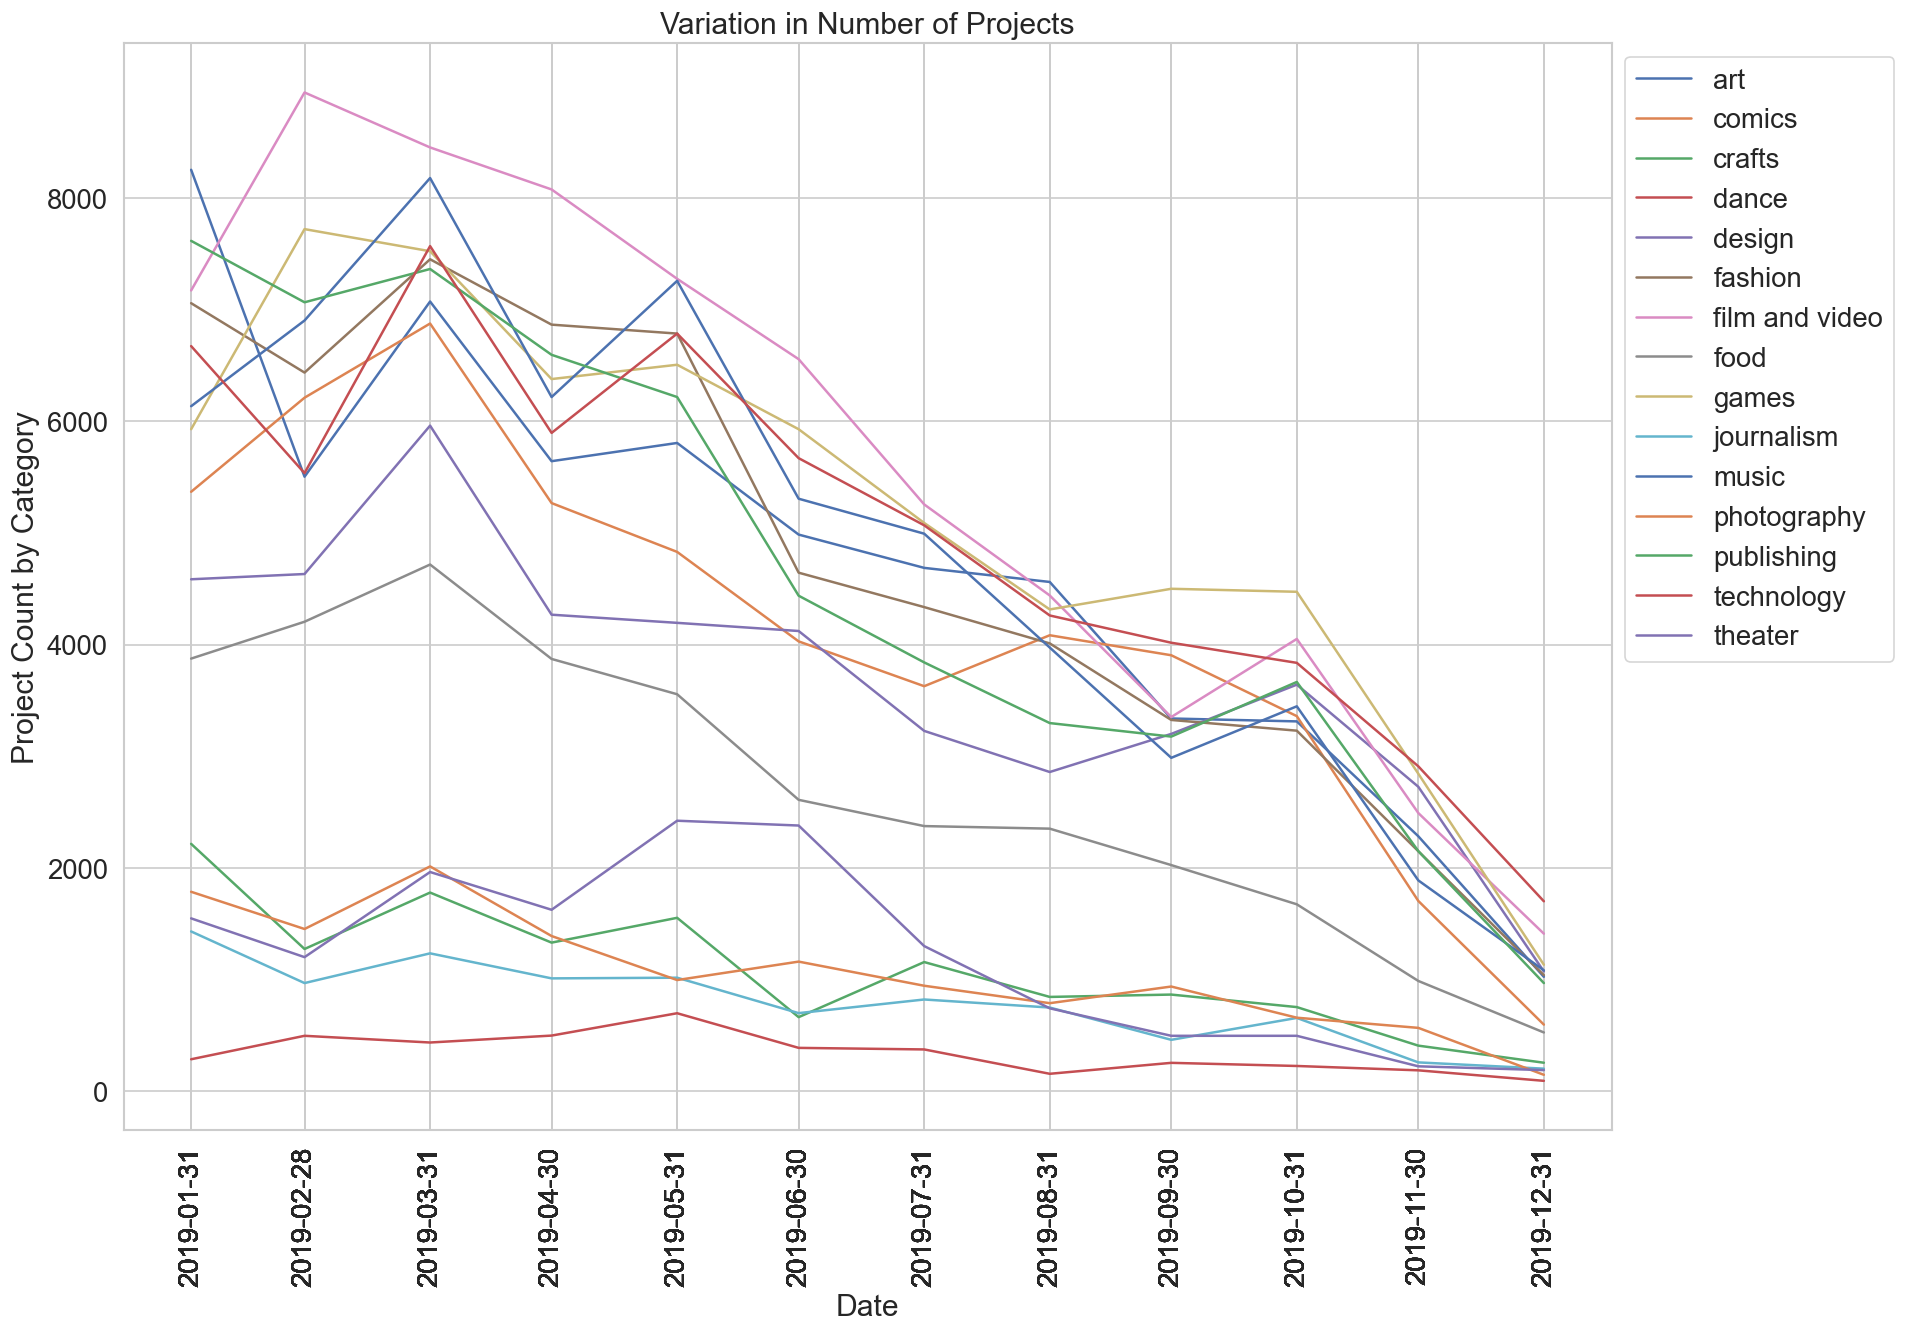

In [59]:
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

#setting up plot
plt.figure(figsize=(16,12), dpi= 120)

#function for plot
for i,c in enumerate(categories):
    plt.plot('launched_at', 'blurb', data= grouped_df_cat.loc[grouped_df_cat.extracted_category == c, :],label=c)
    plt.legend(loc= 'best', bbox_to_anchor = (1,1))
    #plt.ylim(0,500)
    plt.xticks(grouped_df_cat['launched_at'].values, rotation='vertical')
    plt.xlabel('Date')
    plt.ylabel('Project Count by Category')
    plt.title('Variation in Number of Projects')

In [62]:
# Getting unique states
states = list(jan19dec19_sf['state'].unique())
print(len(states))

#setting colors for categories
customcolors_state = ['blue', 'red']

2


In [65]:
# looking at the different funding ranges, we will plot a bunch of graphs
## for eliminating redundancy, we will create a function for generating these graphs

def fr_plots(x,y):
    #dataframe subset with the required range
    fr_xy = pd.DataFrame(jan19dec19_sf[(jan19dec19_sf['goal'] > x) & (jan19dec19_sf['goal'] <= y)])
    #grouping for the first plot, we generate another dataframe
    fr_p1 = pd.DataFrame(fr_xy.groupby('state')['blurb'].count()).reset_index()
    # we plot this dataframe, which shows us the total number of successful and failed projects in our funding range
    plt.figure(figsize=(3,3), dpi= 120)
    plt.bar('state', 'blurb', data=fr_p1)
    plt.xlabel('State')
    plt.ylabel('Project Count')
    plt.title('Project Count per State')
    plt.xticks(rotation='vertical')
    plt.show()
    # now for plotting the time-series, we will have to group by the original fr_xy
    fr_xy_grp = pd.DataFrame(fr_xy.groupby([pd.Grouper(freq='M'), 'state'])['blurb'].count()).reset_index()
    # Now we go on to plot the time-series
    # Handle date time conversions between pandas and matplotlib
    from pandas.plotting import register_matplotlib_converters
    register_matplotlib_converters()
    # Use white grid plot background from seaborn
    sns.set(font_scale=1.5, style="whitegrid")
    #setting up plot
    plt.figure(figsize=(5,5), dpi= 120)
    #function for plot
    for i,c in enumerate(states):
        plt.plot('launched_at', 'blurb', data= fr_xy_grp.loc[fr_xy_grp.state == c, :], color = customcolors_state[i],label=c)
        plt.legend(loc= 'best')
        #plt.ylim(0,500)
        plt.xticks(fr_xy_grp['launched_at'].values, rotation='vertical')
        plt.legend(loc= 'best', bbox_to_anchor = (1,1))
        plt.xlabel('Date')
        plt.ylabel('Project Count')
        plt.title('Failed and Successful Projects')
    # Now we will plot percentage of failed and successful projects over the different funding ranges
    ## first we create a dataframe for pivoting tables to calculate the percentage column
    fr_xy_pt = pd.pivot_table(fr_xy_grp, index='launched_at', columns = 'state', values = 'blurb')
    fr_xy_pt.reset_index(inplace=True)
    fr_xy_pt['failed_percent'] = (fr_xy_pt['failed']/(fr_xy_pt['failed']+fr_xy_pt['successful']))*100
    fr_xy_pt['success_percent'] = (fr_xy_pt['successful']/(fr_xy_pt['failed']+fr_xy_pt['successful']))*100
    #Plotting the failed and successful percentages
    ##failed %
    # Use white grid plot background from seaborn
    sns.set(font_scale=1, style="whitegrid")
    #setting up plot
    plt.figure(figsize=(3,3), dpi= 120)
    plt.plot('launched_at', 'failed_percent', data=fr_xy_pt)
    plt.xlabel('Date')
    plt.ylabel('Percentage of Failed Projects')
    plt.title('Variation in Percentage of Failed Projects')
    plt.xticks(fr_xy_pt['launched_at'].values, rotation='vertical')

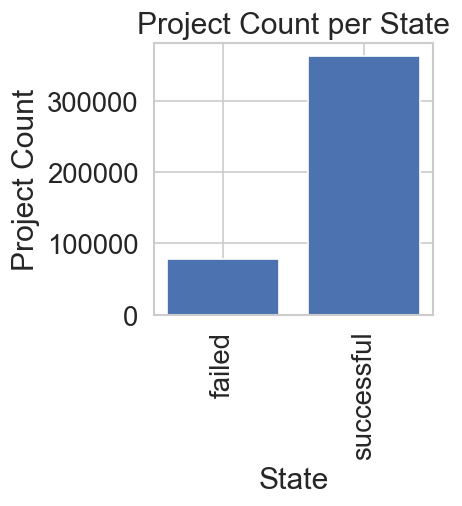

None


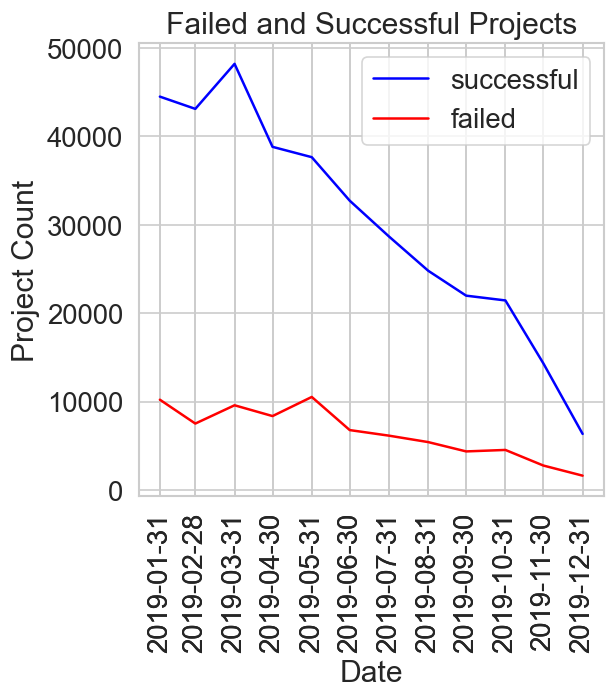

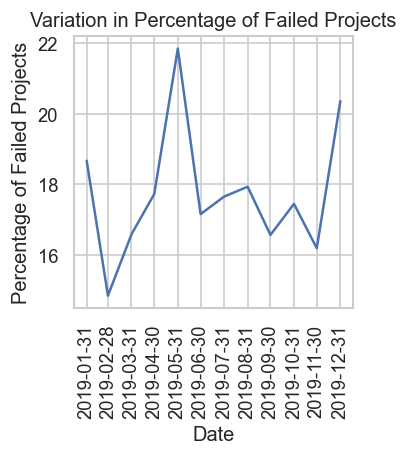

In [66]:
# plots for funding range less than 10k
fr_plots(0, 10000)

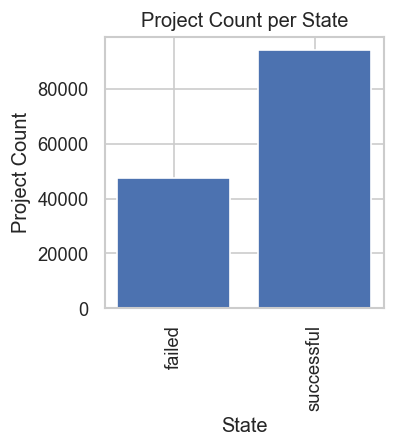

None


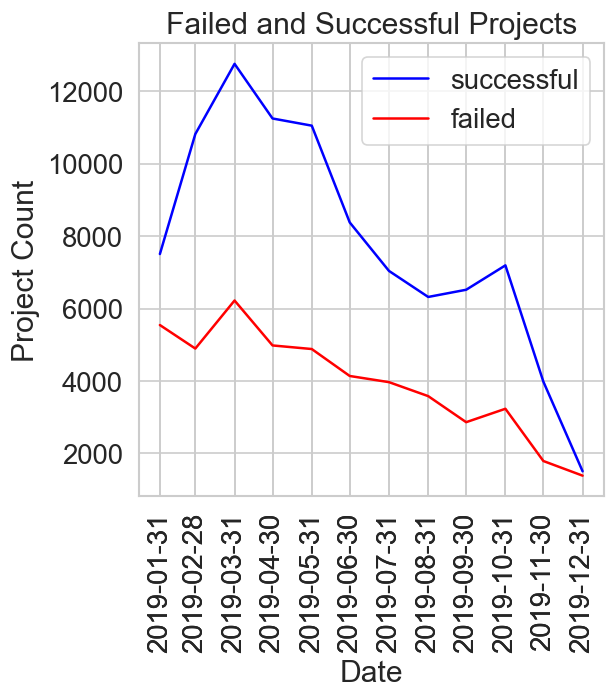

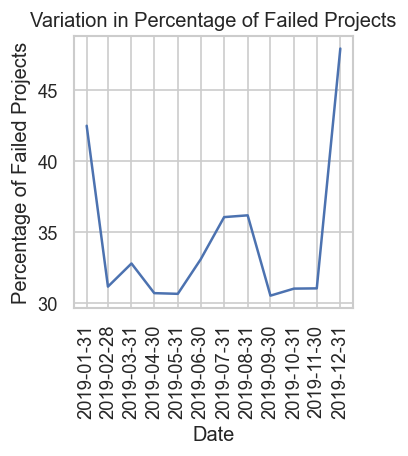

In [67]:
# plots for funding range between 10 k and 100k
fr_plots(10000, 100000)

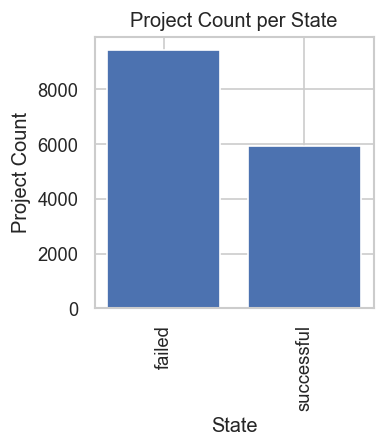

None


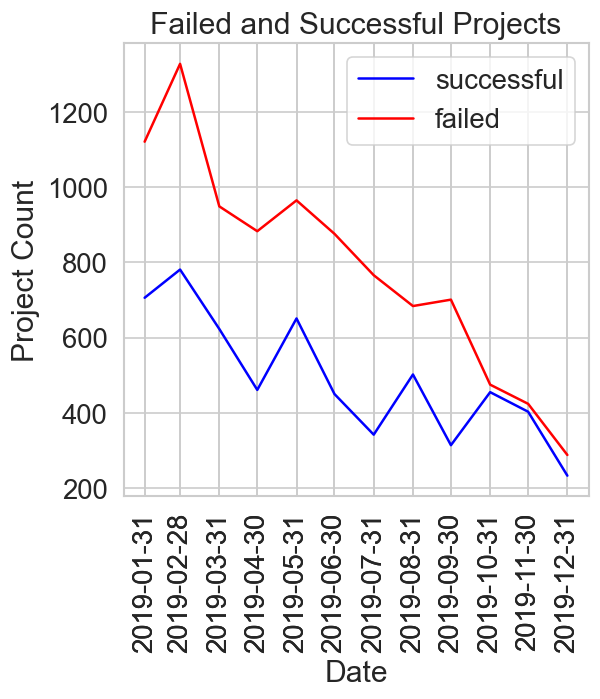

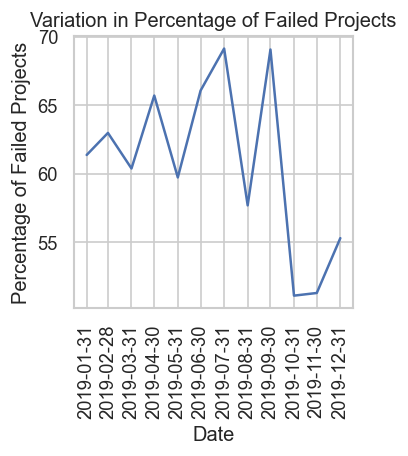

In [68]:
# plots for funding range between 100k and 1M
fr_plots(100000, 1000000)

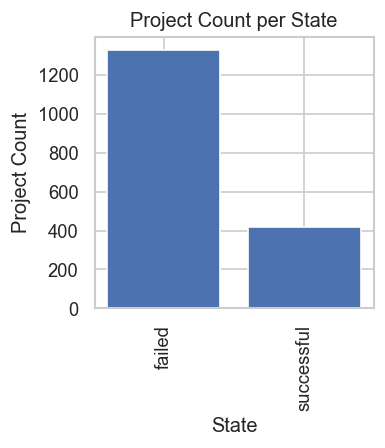

None


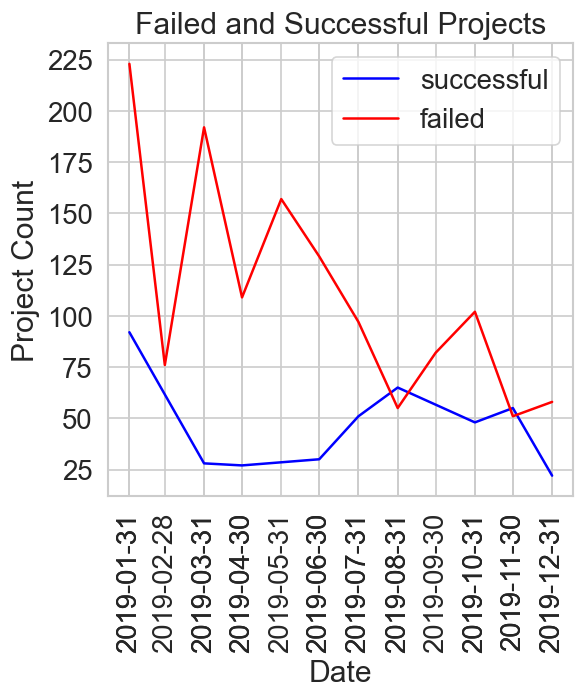

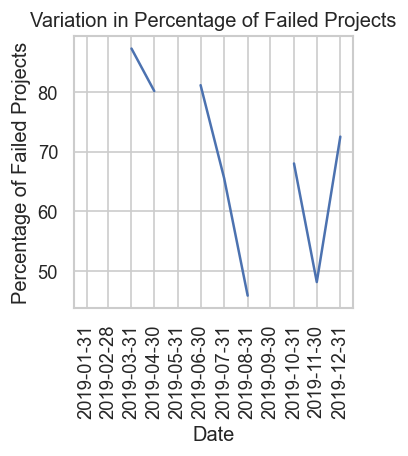

In [69]:
# plots for funding range greater than 1M
fr_plots(1000000, 10000000)

In [72]:
# looking at number of projects across diffrent kinds of states

s = len(df_2019.loc[df_2019.state == 'successful'])
f = len(df_2019.loc[df_2019.state == 'failed'])
l = len(df_2019.loc[df_2019.state == 'live'])
c = len(df_2019.loc[df_2019.state == 'canceled'])
print(s,f,l,c)

463322 136196 80747 16226


In [78]:
# making a dataframe to store these values

state_counts_19 = pd.DataFrame(columns=['success', 'failed', 'live', 'canceled'])
state_counts_19['success'] = [s]
state_counts_19['failed'] = f
state_counts_19['live'] = l
state_counts_19['canceled'] = c
state_counts_19

,success,failed,live,canceled
0,463322,136196,80747,16226
